In [1]:
%load_ext autoreload
%matplotlib notebook 

Incremental Delaunay Triangulation
---

The following notebooks visualizes incremental Delaunay trinagulation. For the triangulation we will use a set of semi-random points in a plane (see chapter [Random Points](#Random-Points). 

The visualization covers the following aspects of the triangulation:
- Creating auxiliary triangle that we subdivide with our set. The triangle has right angle in the bottom left corner of canvas
- Add point after point
- In case, that Delaunay condition is unfulfilled, agorithm legalizes affected triangles
- The last step is to remove the auixliary triangle vertices and edges


## Technical Info

To run this notebook, you need have installed all the dependencies from requirements.txt and files `triangulation.py` and `triangulation_player.py` present in the same folder as the notebook is in.

# Random Points

The random points are generated using uniform grid in each cell we insert random point. This way we get set of point that help visualize. Compare the charts on left and right. The left one shows the points sampled from uniform distribution while the right shows jittered version. Notice the guide lines that proves that each cell contains exactly one point.

**DISCLAIMER**: For the purposes of the visualization, the points generation is limited to only positive coordinates e.g. Each point $p_i \in \mathbb{N}^{+}\times\mathbb{N}^{+}$. Algorithm will work with negative numbers but the visualization won't.

<IPython.core.display.Javascript object>


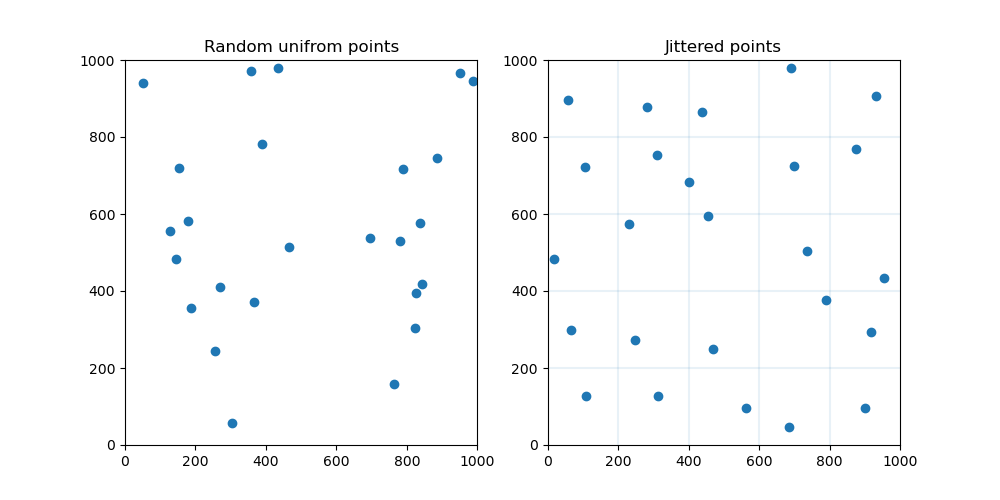

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sample_jittered_points(n_sqrt, xy_lim,seed=123):
    np.random.seed(seed)
    cell_max = int(xy_lim/ n_sqrt)
    
    rand_ints = np.random.randint(cell_max,size=(n_sqrt*n_sqrt,2))
    ij_coors = np.array([(i,j) for i in range(n_sqrt) for j in range(n_sqrt)])
    ij_offsets = ij_coors * cell_max
    return rand_ints + ij_offsets

max_value = 1000
n = 5
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
jittered_pts = sample_jittered_points(n, max_value)
offset = max_value/n

ax2.set_title("Jittered points")
for i in range(n-1):
    coor = (i+1)*offset
    ax2.axhline(coor,alpha=.1)
    ax2.axvline(coor,alpha=.1)


ax1.set_xlim((0,max_value)),ax1.set_ylim((0,max_value))
ax2.set_xlim((0,max_value)), ax2.set_ylim((0,max_value))
ax2.plot(jittered_pts.T[0],jittered_pts.T[1],'o')
random_pts = np.random.randint(max_value,size=(n*n,2))
ax1.plot(random_pts.T[0],random_pts.T[1],'o')
ax1.set_title("Random unifrom points")
plt.show()

# Delaunay Triangulation

Delaunay triangulation is based on a Delaunay condition e.g. each triangle must not contain other points within the triangle's circumference. 

Notice the difference between triangles when condition holds:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Edge_Flip_-_Delaunay_condition_ok.svg/120px-Edge_Flip_-_Delaunay_condition_ok.svg.png)

To the situation when it doesn't:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Point_inside_circle_-_Delaunay_condition_broken.svg/120px-Point_inside_circle_-_Delaunay_condition_broken.svg.png)

*Both images are referenced from Wikipedia*

We can check this quickly calculating determinant of triangles points based on the algoritm described in the wikpedia (see [this link](https://en.wikipedia.org/wiki/Delaunay_triangulation#Algorithms)).

# Visualization

In the following cell, we see a visualization of Delaunay triangulation with the following elements:

- Navy blue dots - Input points used in triangulation
- Translucent navy blue dots - Points not yet used
- Black segments - Edges of triangles of the triangulation
- Orange segments - Edges with auxiliary points

The points are clustered in the bottom left corner to allow for visualization of auxiliary triangle. It is ment to be so. If you wish to remove this behavior, you can interact with the plot and zoom on the area of interest

<IPython.core.display.Javascript object>


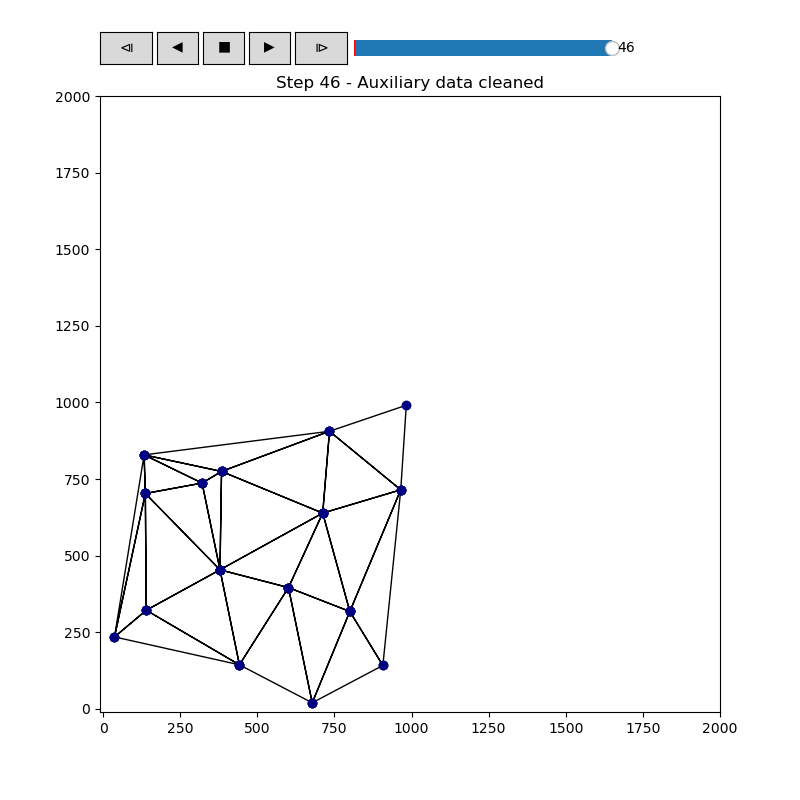

In [3]:
%matplotlib notebook  

from matplotlib import pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8, 8)


from triangulation import delaunay_triangulate_with_snapshots

from triangulation_player import TriangulationPlayer

max_pts_val = 1000
pts = sample_jittered_points(4,max_pts_val,seed = 1)
triangulation = delaunay_triangulate_with_snapshots(pts[:])

# todo store points in triangulation run results
p = TriangulationPlayer(triangulation).play_interactive(xlim=(-10,max_pts_val*2),ylim=(-10,max_pts_val*2))
p.set_pos(4)

<IPython.core.display.Javascript object>


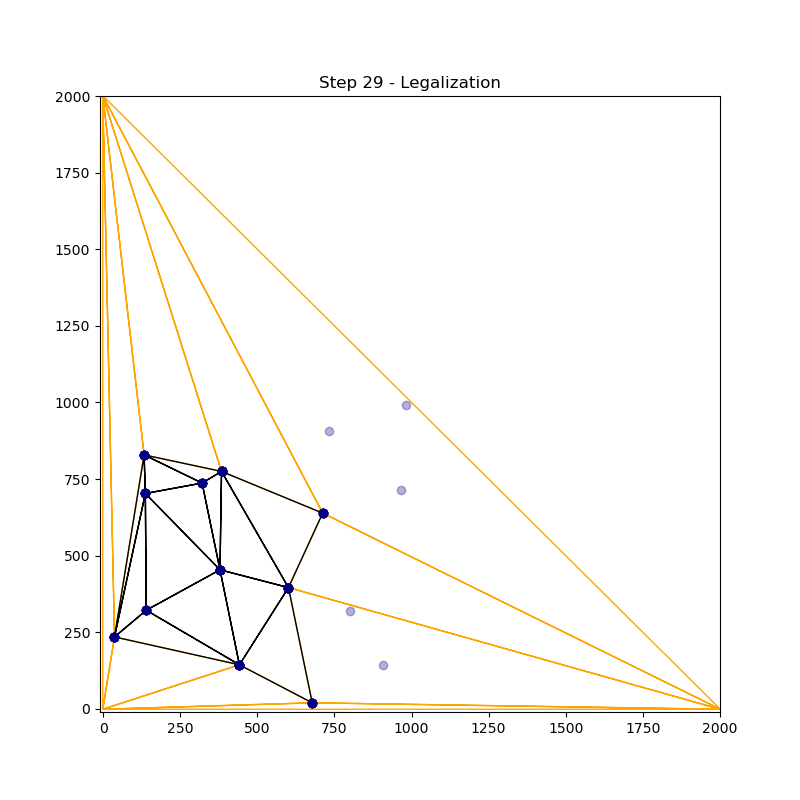

In [5]:
from matplotlib import rcParams
rcParams['animation.convert_path'] = r'/usr/bin/convert'
myAnimation = TriangulationPlayer(triangulation).get_function(xlim=(-10,max_pts_val*2),ylim=(-10,max_pts_val*2))
myAnimation.save('triang.gif', writer='imagemagick', fps=2)